# Prueba jupyter api_pandas


In [39]:
import requests
import pandas as pd
import matplotlib.pyplot as plt


In [40]:

def sacarTemp():
    url='https://www.el-tiempo.net/api/json/v2/home'
    response= requests.get(url)
    if response.status_code==200:
        data= response.json()

        ciudades=[]
        temperatura_max=[]
        temperatura_min=[]

        for ciudad in data["ciudades"]:
            ciudades.append(ciudad["name"])
            temperatura_max.append(int(ciudad["temperatures"]["max"]))
            temperatura_min.append(int(ciudad["temperatures"]["min"]))

        df=pd.DataFrame({
            'Ciudad':ciudades,
            'Temperatura Max':temperatura_max,
            'Temperatura Min': temperatura_min
        })

        df.to_csv('datos_tiempo.csv',index=False,encoding='utf-8')
        print("los datos se guardaron correctamente")
    else:
        print("error al obtener los datos de la api")

In [41]:
def crearGrafico():
    df=pd.read_csv('datos_tiempo.csv')
    plt.figure(figsize=(10,6))
    plt.bar(df['Ciudad'], df['Temperatura Max'], color='red', label='Temperatura Máx')
    plt.bar(df['Ciudad'],df['Temperatura Min'], color='blue', label='Temperatura Mín')

    plt.xlabel('Ciudad')
    plt.ylabel('Temperatura')
    plt.title('Temperaturas máximas y minimas por ciudad')

    plt.xticks(rotation=45,ha='right')
    plt.legend()

    plt.tight_layout()
    plt.show()

los datos se guardaron correctamente


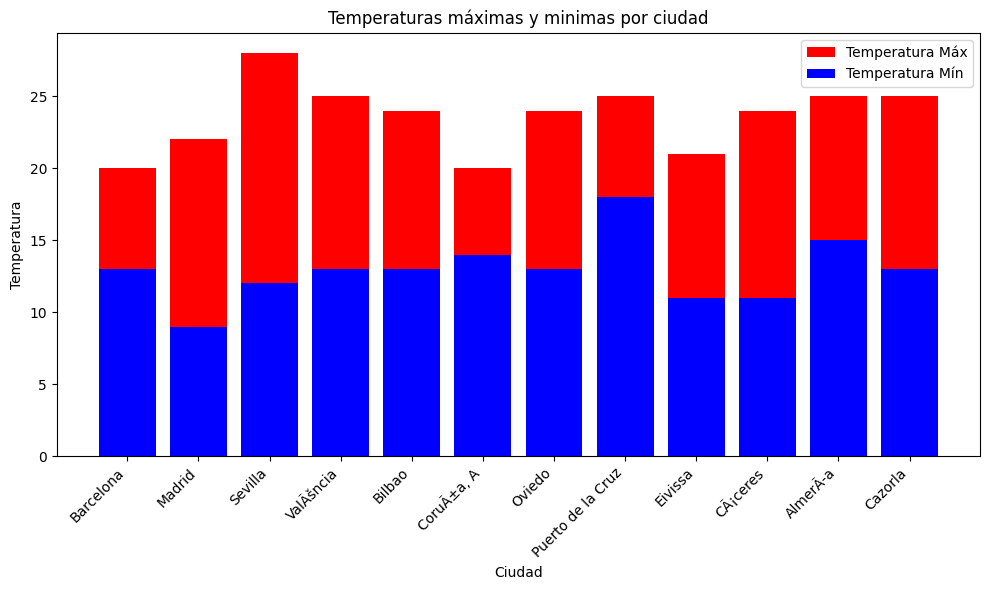

In [42]:
sacarTemp()
crearGrafico()

In [43]:
def mostrarDatos():
    df=pd.read_csv('datos_tiempo.csv')
    #print(df.head()) #por defecto muestra los 5 primeros

    #df.describe() -> porcentajes, estadisticas de los registros
    
    df["media"]= df["Temperatura Max"] + df["Temperatura Min"] /2
    print(df)

In [44]:
mostrarDatos()

               Ciudad  Temperatura Max  Temperatura Min  media
0           Barcelona               20               13   26.5
1              Madrid               22                9   26.5
2             Sevilla               28               12   34.0
3           ValÃšncia               25               13   31.5
4              Bilbao               24               13   30.5
5          CoruÃ±a, A               20               14   27.0
6              Oviedo               24               13   30.5
7   Puerto de la Cruz               25               18   34.0
8             Eivissa               21               11   26.5
9            CÃ¡ceres               24               11   29.5
10           AlmerÃ­a               25               15   32.5
11            Cazorla               25               13   31.5


In [45]:
def filtar():
    df=pd.read_csv('datos_tiempo.csv')
    tempMayor25=df[(df["Temperatura Max"]>=25) & (df["Temperatura Min"]<=15)] #Con pandas se usa & o |
    print (tempMayor25)


In [46]:
filtar()

       Ciudad  Temperatura Max  Temperatura Min
2     Sevilla               28               12
3   ValÃšncia               25               13
10   AlmerÃ­a               25               15
11    Cazorla               25               13


In [47]:
def buscarConBaseDatos():
    df=pd.read_csv('datos_tiempo.csv')
    print(df.groupby("Temperatura Max").size()) #agrupa por temperatura y size lo cuenta

In [48]:
buscarConBaseDatos()

Temperatura Max
20    2
21    1
22    1
24    3
25    4
28    1
dtype: int64


In [72]:
df=pd.read_csv('datos_tiempo.csv')
def crearColumna(fila):
    resultado= fila["Temperatura Max"] + fila["Temperatura Min"]/2
    return resultado
df["media2"]=df.apply(crearColumna,axis=1) #axis=1 me lo aplica por cada columna
#df.head()
print(df)
df.to_csv("datos_media_temp.csv")


               Ciudad  Temperatura Max  Temperatura Min  media2
0           Barcelona               20               13    26.5
1              Madrid               22                9    26.5
2             Sevilla               28               12    34.0
3           ValÃšncia               25               13    31.5
4              Bilbao               24               13    30.5
5          CoruÃ±a, A               20               14    27.0
6              Oviedo               24               13    30.5
7   Puerto de la Cruz               25               18    34.0
8             Eivissa               21               11    26.5
9            CÃ¡ceres               24               11    29.5
10           AlmerÃ­a               25               15    32.5
11            Cazorla               25               13    31.5


In [63]:
def agregugarPorFunciones():
    grupoCiudades=df.groupby("Ciudad").agg({
        "Temperatura Max": 'sum', ##sumaria todas las temperaturas maximas de cada ciudad,suponiendo que tenga varias
        "Temperatura Min": 'mean', ##Media
        #max -> sacaria el maximo
        
    })
    print(grupoCiudades)
#agregugarPorFunciones()

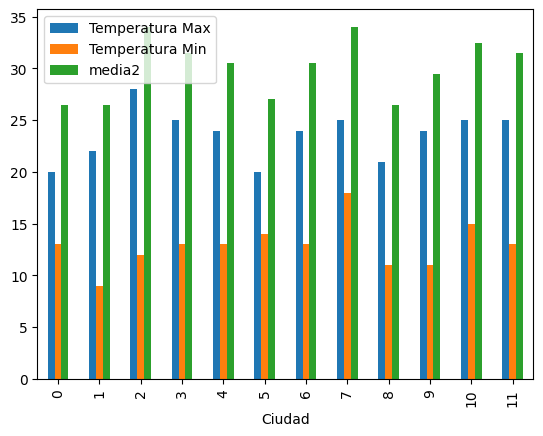

In [69]:
def grafico2():
    df.plot(kind="bar")
    plt.xlabel('Ciudad')
    plt.show()
grafico2()